# CSC 369 2.0 Machine Learning Assignment
---

## Table of Contents

1. #### <a href="#Import-of-Libraries">Import of Libraries</a>
2. #### <a href="#File-Loading-and-Pre-Processing">File loading and Pre-Processing</a>
    * <a href="#Checking-for-Missing-Data-in-the-Input-Column">Label conversion to Numericals</a>
    * <a href="#Checking-for-Missing-Data-in-the-Input-Column">Checking for Missing Data</a>
    * <a href="#Split-of-Features-&-Labels">Split of Features & Labels</a>
    * <a href="#Outlier-Detection">Outlier Detection</a>
    * <a href="#Handling-Missing-Data-&-One-Hot-Encoding-(Coding-of-Discrete-inputs)">Handling Missing Data & One Hot Encoding (Coding of Discrete inputs)</a>
    * <a href="#Feature-Extraction">Feature Extraction</a>
    * <a href="#Normalize-Data-Based-on-L1">Normalization</a>
    
    
3. #### <a href="#KNN-Model-using-SKLearn">KNN Model using SKLearn</a>
    * <a href="#KNN-Model-Training">Model Training</a>
    * <a href="#KNN-Validation">Validation</a>
    * <a href=“#KNN-Post-Training-Analysis”>Post Training Analysis</a>
        * <a href="#KNN-Accuracy-Score">Accuracy Score</a>
        * <a href="#KNN-Confusion-Matrix">Confusion Matrix</a>
        * <a href="#KNN-Classification-Report">Classification Report</a>
            * Precision
            * Recall
            * F-Measure
        * <a href="#Variation-of-K-Neighbor-Classifier-for-Data-WITH-OUTLIERS">Variation of K Neighbor Classifier</a>
            * <a href="#Variation-of-K-Neighbor-Classifier-for-Data-WITH-OUTLIERS">With Outliers</a>
            * <a href="#Variation-of-K-Neighbor-Classifier-for-Data-WITHOUT-OUTLIERS">Without Outliers</a>
            
            
4. #### <a href="#Logistic-Regression-using-Keras">Logistic Regression using Keras</a>
    * <a href="#LR---Model-Creation-and-Model-Training-based-on-Early-Stopping-CallBack">Model Training and Validation</a>
    * <a href=“#Post-Training-Analysis---Logisitic-Regression”>Post Training Analysis</a>
        * <a href="#Accuracy-Score----LR">Accuracy Score</a>
        * <a href="#Confusion-Matrix---LR">Confusion Matrix</a>
        * <a href="#Classification-Report---LR">Classification Report</a>
             * Precision
             * Recall
             * F-Measure


5. #### <a href="#Neural-Network-using-Keras">Neural Network using Keras</a>
    * <a href="#Neural-Network-Model-Creation-and-Model-Training-based-on-Early-Stopping-CallBack">Model Training and Validation</a>
    * <a href="#Post-Training-Analysis---NN">Post Training Analysis</a>
        * <a href="#Accuracy-Score----NN">Accuracy Score</a>
        * <a href="#Confusion-Matrix----NN">Confusion Matrix</a>
        * <a href="#Classification-Report----NN">Classification Report</a>
            * Precision
            * Recall
            * F-Measure
            
            
            


---


1. ## Import of Libraries
---

In [294]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.cross_validation import train_test_split
import sklearn.feature_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

2. ## File Loading and Pre Processing
---

In [295]:
#loading the data file
# sep='\s*,\s*' was added to avoid spaces. Engine = python was used to support the s* special characters
df = pd.read_csv('salary.csv',sep='\s*,\s*',engine='python')

* ### Checking for Missing Data in the Input Column
<br> Since the value is 0 (No missing values), we can convert the categorical data in the column to numerical values directly.

In [296]:
#Checking for any misssing data 
df['income'].isnull().sum()

0

In [297]:
#Since there are No missing data labels, will be converted to numeric values
# <=50K Converted 0 and else 1 
df['income'] = [0 if x =='<=50K' else 1 for x in df['income']]

In [298]:
#checking the count for the income types
print('Value Counts :')
df['income'].value_counts()

Value Counts :


0    24720
1     7841
Name: income, dtype: int64

In [299]:
#Checking whether any unexpected changes has happened to the data set. Size has not changed, therefore can proceed.
print('\nIncome size :')
df['income'].size


Income size :


32561

* ### Split of Features & Labels 

In [300]:
#setting dataframes for the axis
X = df.drop('income',1)
Y = df.income

* ### Outlier Detection
<br> Inituitively a person who has a relatively *High Capital Gain* and a relatively *High Capital Loss* could probably earn greater than 50K and less than 50K respectively.

<br> **Eg :** Having Jeff Bezos's (World's richest person) in the data set can manipulate the output.

<br> Therefore relatively *High Capital Gain* and a relatively *High Capital Loss* rows are dropped from the Dataset.

> ### Special Note <br>
The df2 dataframe is created below as a duplicate of df since when the training is done, accuracies will be checked with and withoutout outliers since the outlier features are selected on a user a perspective and it can be subjected to change.


In [301]:
#prepare a seperate dataframe for outlier detection
df2 = pd.read_csv('salary.csv',sep='\s*,\s*',engine='python')
df2['income'] = [0 if x =='<=50K' else 1 for x in df2['income']]

#outliers using Quatile Range function
def find_outliers_tukey(x):
	q1 = np.percentile(x,25)
	q3 = np.percentile(x,75)
	iqr= q3-q1

	floor = q1-1.5*iqr
	ceiling = q3 +1.5*iqr

	outlier_indices = list(x.index[(x<floor) | (x > ceiling)])
	outlier_values = list(x[outlier_indices])
	return outlier_indices,outlier_values
    
#Index and Values of the Capital Gain Outliers
tukey_indices, tukey_values = find_outliers_tukey(df2['capital-gain'])

#Drop the outliers from the Dataframe
for x in tukey_indices:
    df2 = df2.drop(x,0)

#setting dataframes for the axis
X_OD = df2.drop('income',1)
Y_OD = df2.income

#Index and Values of the Capital Loss Outliers
tukey_indices, tukey_values = find_outliers_tukey(df2['capital-loss'])

#Drop the outliers from the Dataframe
for x in tukey_indices:
    df2 = df2.drop(x,0)

#setting dataframes for the axis
X_OD = df2.drop('income',1)
Y_OD = df2.income

* ### Handling Missing Data & One Hot Encoding (Coding of Discrete inputs)

In [302]:
#One Hot Encoding the Feature List to Numerical Values
#Feature list with Non Numerical Values
todummy_list = ['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'sex','native-country']

In [303]:
#function for conversion
def dummy_df(df,todummy_list):
	for x in todummy_list:
		dummies = pd.get_dummies(df[x],prefix=x,dummy_na=False)
		df = df.drop(x,1)
		df = pd.concat([df,dummies],axis=1)

	return df

In [304]:
#converting the non numerical values to one hot encoded values
X = dummy_df(X, todummy_list)
#Doing so Empty values were converted to 0s

#converting the Outlier detected set
X_OD = dummy_df(X_OD, todummy_list)

In [305]:
#View the X
X.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
#View the Outliear detected One Hot Encoded X
X_OD.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


> ### Special Note <br>
The reason to have data stored one with outliear and other without outliears is because when the training is done, accuracies will be checked with and withoutout outliers. Since the outlier features are **selected on a user a perspective and it can be subjected to change.**


In [307]:
#Splitting the Non Outliear Detected data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,random_state=1)

#Splitting the Outliear Detected data
X_OD_train, X_OD_test, Y_OD_train, Y_OD_test = train_test_split(X_OD,Y_OD,train_size=0.7,random_state=1)

* ### Feature Extraction

In [308]:
#Feature selection

#Selecting the K = 20 Best features for the data with Outliers
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train,Y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected  = X_test[colnames_selected]

#Selecting the K = 20 Best features for the data WITHOUT Outliers
selectOD = sklearn.feature_selection.SelectKBest(k=20)
selected_ODfeatures = select.fit(X_OD_train,Y_OD_train)
indices_ODselected = selected_features.get_support(indices=True)
colnames_ODselected = [X_OD.columns[i] for i in indices_selected]

X_OD_train_selected = X_OD_train[colnames_ODselected]
X_OD_test_selected  = X_OD_test[colnames_ODselected]

/anaconda3/envs/tensorflowsessions/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [77] are constant.
  UserWarning)
/anaconda3/envs/tensorflowsessions/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/anaconda3/envs/tensorflowsessions/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [2 3] are constant.
  UserWarning)


* ### Normalize Data Based on L1

In [309]:
# Normalize the data with Outliers
X_train_selected_Normalized = preprocessing.normalize(X_train_selected,norm='l1')
X_test_selected_Normalized = preprocessing.normalize(X_test_selected,norm='l1')

# Normalize the data without Outliers
X_OD_train_selected_Normalized = preprocessing.normalize(X_OD_train_selected,norm='l1')
X_OD_test_selected_Normalized = preprocessing.normalize(X_OD_test_selected,norm='l1')

> #### By this stage all Pre Processing stages have been completed.

3. ## KNN Model using SKLearn
---

* ### KNN Model Training

In [310]:
#Training the Model with Outliers
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_selected_Normalized,Y_train)

#Training the Model without Outliers
clf_OD = neighbors.KNeighborsClassifier(n_neighbors=5)
clf_OD.fit(X_OD_train_selected_Normalized,Y_OD_train)

#clf.fit(X_train_selected,Y_train)
#accuracy_train = clf.score(X_train_selected,Y_train)
#accuracy_test = clf.score(X_test_selected,Y_test)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [311]:
#accuracy with outliers
accuracy_train = clf.score(X_train_selected_Normalized,Y_train)
accuracy_test = clf.score(X_test_selected_Normalized,Y_test)

#accuracy without outliears
accuracy_OD_train = clf_OD.score(X_OD_train_selected_Normalized,Y_OD_train)
accuracy_OD_test = clf_OD.score(X_OD_test_selected_Normalized,Y_OD_test)

* ### KNN Validation

In [312]:
print('Accuracy on Training Set with Outliers : %.3f%%' %(accuracy_train*100))
print('Accuracy on Test Set  with Outliers  : %.3f%% \n' %(accuracy_test*100))

print('Accuracy on Training Set without Outliers : %.3f%%' %(accuracy_OD_train*100))
print('Accuracy on Test Set  without Outliers  : %.3f%%' %(accuracy_OD_test*100))


Accuracy on Training Set with Outliers : 86.583%
Accuracy on Test Set  with Outliers  : 82.547% 

Accuracy on Training Set without Outliers : 86.768%
Accuracy on Test Set  without Outliers  : 82.280%


* ### KNN Post Training Analysis


- ### KNN Accuracy Score

In [313]:
#with Outliear data
Y_predicted = clf.predict(X_test_selected_Normalized)

#without Outliear data
Y_OD_predicted = clf.predict(X_OD_test_selected_Normalized)

In [314]:
#predicted with outliers
ac = accuracy_score(Y_test, Y_predicted)

#predicted without Outliears
ac_OD = accuracy_score(Y_OD_test, Y_OD_predicted)

In [315]:
print('Accuracy based on the Prediction with Outliers : %f%% \n'%(ac*100))
print('Accuracy based on the Prediction without Outliers : %f%%'%(ac_OD*100))

Accuracy based on the Prediction with Outliers : 82.546832% 

Accuracy based on the Prediction without Outliers : 85.210025%


- ### KNN Confusion Matrix

In [316]:
#with Outliers
confusion_matrix(Y_test, Y_predicted)



array([[6812,  738],
       [ 967, 1252]])

In [317]:
#without Outliers
confusion_matrix(Y_OD_test, Y_OD_predicted)

array([[6380,  469],
       [ 788,  862]])

- ### KNN Classification Report

In [318]:
#with outliers
print(classification_report(Y_test, Y_predicted))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      7550
          1       0.63      0.56      0.59      2219

avg / total       0.82      0.83      0.82      9769



In [319]:
#without outliers
print(classification_report(Y_OD_test, Y_OD_predicted))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91      6849
          1       0.65      0.52      0.58      1650

avg / total       0.84      0.85      0.85      8499



- ### Variation of K Neighbor Classifier for Data WITH OUTLIERS

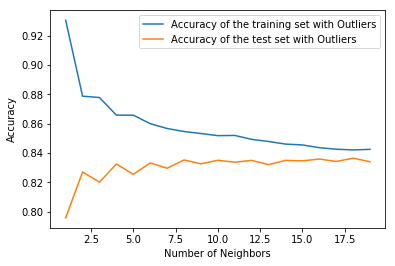

In [320]:
# Create two lists for training and test accuracies with Outliers
training_accuracy = []
test_accuracy = []
max_value = 0
# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,20)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    #with Outliers
    clf2 = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf2.fit(X_train_selected_Normalized, Y_train)
    training_accuracy.append(clf2.score(X_train_selected_Normalized, Y_train))
    
    test_accuracy.append(clf2.score(X_test_selected_Normalized, Y_test))
    
# Visualize results - to help with deciding which n_neigbors yields the best results 
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set with Outliers')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set with Outliers')

plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

- ### Variation of K Neighbor Classifier for Data WITHOUT OUTLIERS

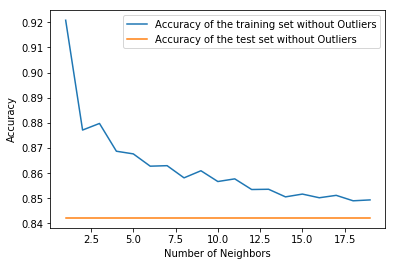

In [321]:
# Create two lists for training and test accuracies withOUT Outliers
training_OD_accuracy = []
test_OD_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,20)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    #without Outliers
    clf2_OD = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf2_OD.fit(X_OD_train_selected_Normalized, Y_OD_train)
    training_OD_accuracy.append(clf2_OD.score(X_OD_train_selected_Normalized, Y_OD_train))
    test_OD_accuracy.append(clf2.score(X_OD_test_selected_Normalized, Y_OD_test))
    
# Visualize results - to help with deciding which n_neigbors yields the best results 

plt.plot(neighbors_settings, training_OD_accuracy, label='Accuracy of the training set without Outliers')
plt.plot(neighbors_settings, test_OD_accuracy, label='Accuracy of the test set without Outliers')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

4. ## Logistic Regression using Keras

In [322]:
#importing required Keras Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

> ### LR - Model Creation and Model Training based on Early Stopping CallBack 
> ### Using Early Stopping **<u>Overfitting</u>** can be avoided

In [323]:
#To train with outliers
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))

#To train without outliers
model_OD = Sequential()
model_OD.add(Dense(1, input_dim=20, activation='sigmoid'))

#The 2 models will be identical, used just to train them seperately.

In [324]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_OD.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [325]:
#early stopping
monitor = EarlyStopping(monitor = 'val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')

#fit the model with Outliers
model.fit(X_train_selected_Normalized,Y_train,epochs=1000,batch_size=100, validation_data=(X_test_selected_Normalized, Y_test),callbacks=[monitor])

Train on 22792 samples, validate on 9769 samples
Epoch 1/1000
22792/22792 [==============================] - 1s 57us/step - loss: 0.6403 - acc: 0.6928 - val_loss: 0.5801 - val_acc: 0.7729
Epoch 2/1000
22792/22792 [==============================] - 1s 30us/step - loss: 0.5695 - acc: 0.7533 - val_loss: 0.5407 - val_acc: 0.7729
Epoch 3/1000
22792/22792 [==============================] - 1s 31us/step - loss: 0.5492 - acc: 0.7533 - val_loss: 0.5267 - val_acc: 0.7729
Epoch 4/1000
22792/22792 [==============================] - 1s 29us/step - loss: 0.5417 - acc: 0.7533 - val_loss: 0.5204 - val_acc: 0.7729
Epoch 5/1000
22792/22792 [==============================] - 1s 30us/step - loss: 0.5378 - acc: 0.7533 - val_loss: 0.5167 - val_acc: 0.7729
Epoch 6/1000
22792/22792 [==============================] - 1s 30us/step - loss: 0.5353 - acc: 0.7533 - val_loss: 0.5142 - val_acc: 0.7729
Epoch 7/1000
22792/22792 [==============================] - 1s 30us/step - loss: 0.5332 - acc: 0.7533 - val_loss: 0.5

In [326]:
#fit the model with Outliers
model_OD.fit(X_OD_train_selected_Normalized,Y_OD_train,epochs=1000,batch_size=100, validation_data=(X_OD_test_selected_Normalized, Y_OD_test),callbacks=[monitor])

Train on 19831 samples, validate on 8499 samples
Epoch 1/1000
19831/19831 [==============================] - 1s 53us/step - loss: 0.6015 - acc: 0.8069 - val_loss: 0.5494 - val_acc: 0.8059
Epoch 2/1000
19831/19831 [==============================] - 1s 32us/step - loss: 0.5224 - acc: 0.8114 - val_loss: 0.5116 - val_acc: 0.8059
Epoch 3/1000
19831/19831 [==============================] - 1s 32us/step - loss: 0.4987 - acc: 0.8114 - val_loss: 0.4995 - val_acc: 0.8059
Epoch 4/1000
19831/19831 [==============================] - 1s 29us/step - loss: 0.4904 - acc: 0.8114 - val_loss: 0.4953 - val_acc: 0.8059
Epoch 5/1000
19831/19831 [==============================] - 1s 32us/step - loss: 0.4873 - acc: 0.8114 - val_loss: 0.4939 - val_acc: 0.8059
Epoch 6/1000
19831/19831 [==============================] - 1s 31us/step - loss: 0.4861 - acc: 0.8114 - val_loss: 0.4933 - val_acc: 0.8059
Epoch 7/1000
19831/19831 [==============================] - 1s 32us/step - loss: 0.4856 - acc: 0.8114 - val_loss: 0.4

* ### Post Training Analysis - Logisitic Regression

In [327]:
#This generates the probability with Outliers
Y_predicted = model.predict(X_test_selected_Normalized)
#This generate the final classes with Outliers
Y_predicted2 = model.predict_classes(X_test_selected_Normalized)

#This generates the probability with Outliers
Y_OD_predicted = model_OD.predict(X_OD_test_selected_Normalized)
#This generate the final classes with Outliers
Y_OD_predicted2 = model_OD.predict_classes(X_OD_test_selected_Normalized)

- ### Accuracy Score  - LR

In [328]:
#accuracy score with outliers
acc = accuracy_score(Y_test, Y_predicted2)
#accuracy score without outliers
acc_OD = accuracy_score(Y_OD_test, Y_OD_predicted2)


In [329]:
print('Accuracy Score with Outliers : %.f%%\n'%(acc*100))
print('Accuracy Score without Outliers : %.f%%\n'%(acc_OD*100))

Accuracy Score with Outliers : 79%

Accuracy Score without Outliers : 81%



- ### Confusion Matrix - LR

In [330]:
#confusion matrix with Outliers
confusion_matrix(Y_test, Y_predicted2)

array([[7234,  316],
       [1758,  461]])

In [331]:
#confusion matrix without Outliers
confusion_matrix(Y_OD_test, Y_OD_predicted2)

array([[6849,    0],
       [1650,    0]])

- ### Classification Report - LR

In [332]:
#with outliers
print(classification_report(Y_test, Y_predicted2))

             precision    recall  f1-score   support

          0       0.80      0.96      0.87      7550
          1       0.59      0.21      0.31      2219

avg / total       0.76      0.79      0.75      9769



In [333]:
#withOUT outliers
print(classification_report(Y_OD_test, Y_OD_predicted2))

             precision    recall  f1-score   support

          0       0.81      1.00      0.89      6849
          1       0.00      0.00      0.00      1650

avg / total       0.65      0.81      0.72      8499



/anaconda3/envs/tensorflowsessions/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5. ## Neural Network using Keras


> ### Neural Network Model Creation and Model Training based on Early Stopping CallBack 
> ### Using Early Stopping **<u>Overfitting</u>** can be avoided

In [334]:
#Model to train with outliers
model = Sequential()
model.add(Dense(30, input_dim=20, activation='relu'))
model.add(Dense(10))
model.add(Dense(1,activation='sigmoid'))

#Model to train withOUT outliers
model_OD = Sequential()
model_OD.add(Dense(30, input_dim=20, activation='relu'))
model_OD.add(Dense(10))
model_OD.add(Dense(1,activation='sigmoid'))

In [335]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_OD.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [336]:
#add early stopping
monitor = EarlyStopping(monitor = 'val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')

#fit the model with Outliers
model.fit(X_train_selected_Normalized,Y_train,epochs=1000,batch_size=100, validation_data=(X_test_selected_Normalized, Y_test),callbacks=[monitor],)

Train on 22792 samples, validate on 9769 samples
Epoch 1/1000
22792/22792 [==============================] - 1s 58us/step - loss: 0.5863 - acc: 0.7278 - val_loss: 0.5294 - val_acc: 0.7729
Epoch 2/1000
22792/22792 [==============================] - 1s 31us/step - loss: 0.5439 - acc: 0.7533 - val_loss: 0.5195 - val_acc: 0.7729
Epoch 3/1000
22792/22792 [==============================] - 1s 36us/step - loss: 0.5371 - acc: 0.7533 - val_loss: 0.5136 - val_acc: 0.7729
Epoch 4/1000
22792/22792 [==============================] - 1s 36us/step - loss: 0.5311 - acc: 0.7533 - val_loss: 0.5086 - val_acc: 0.7729
Epoch 5/1000
22792/22792 [==============================] - 1s 36us/step - loss: 0.5264 - acc: 0.7533 - val_loss: 0.5051 - val_acc: 0.7729
Epoch 6/1000
22792/22792 [==============================] - 1s 36us/step - loss: 0.5230 - acc: 0.7693 - val_loss: 0.5025 - val_acc: 0.7902
Epoch 7/1000
22792/22792 [==============================] - 1s 36us/step - loss: 0.5205 - acc: 0.7759 - val_loss: 0.5

In [337]:
#fit the model withOUT Outliers
model_OD.fit(X_OD_train_selected_Normalized,Y_OD_train,epochs=1000,batch_size=100, validation_data=(X_OD_test_selected_Normalized, Y_OD_test),callbacks=[monitor],)

Train on 19831 samples, validate on 8499 samples
Epoch 1/1000
19831/19831 [==============================] - 1s 61us/step - loss: 0.5400 - acc: 0.8099 - val_loss: 0.4962 - val_acc: 0.8059
Epoch 2/1000
19831/19831 [==============================] - 1s 36us/step - loss: 0.4856 - acc: 0.8114 - val_loss: 0.4917 - val_acc: 0.8059
Epoch 3/1000
19831/19831 [==============================] - 1s 37us/step - loss: 0.4839 - acc: 0.8114 - val_loss: 0.4917 - val_acc: 0.8059
Epoch 4/1000
19831/19831 [==============================] - 1s 35us/step - loss: 0.4838 - acc: 0.8114 - val_loss: 0.4915 - val_acc: 0.8059
Epoch 5/1000
19831/19831 [==============================] - 1s 36us/step - loss: 0.4838 - acc: 0.8114 - val_loss: 0.4915 - val_acc: 0.8059
Epoch 6/1000
19831/19831 [==============================] - 1s 41us/step - loss: 0.4837 - acc: 0.8114 - val_loss: 0.4915 - val_acc: 0.8059
Epoch 7/1000
19831/19831 [==============================] - 1s 38us/step - loss: 0.4837 - acc: 0.8114 - val_loss: 0.4

* ### Post Training Analysis - NN

In [338]:
#This generates the probability with Outliers
Y_predicted = model.predict(X_test_selected_Normalized)
#This generate the final classes with Outliers
Y_predicted2 = model.predict_classes(X_test_selected_Normalized)

#This generates the probability with Outliers
Y_OD_predicted = model_OD.predict(X_OD_test_selected_Normalized)
#This generate the final classes with Outliers
Y_OD_predicted2 = model_OD.predict_classes(X_OD_test_selected_Normalized)

- ### Accuracy Score  - NN

In [339]:
#accuracy score with outliers
acc = accuracy_score(Y_test, Y_predicted2)
#accuracy score without outliers
acc_OD = accuracy_score(Y_OD_test, Y_OD_predicted2)


In [340]:
print('Accuracy Score with Outliers : %.f%%\n'%(acc*100))
print('Accuracy Score without Outliers : %.f%%\n'%(acc_OD*100))

Accuracy Score with Outliers : 79%

Accuracy Score without Outliers : 81%



- ### Confusion Matrix  - NN

In [341]:
#confusion matrix with Outliers
confusion_matrix(Y_test, Y_predicted2)

array([[7234,  316],
       [1758,  461]])

In [342]:
#confusion matrix without Outliers
confusion_matrix(Y_OD_test, Y_OD_predicted2)

array([[6849,    0],
       [1650,    0]])

- ### Classification Report  - NN

In [343]:
#with outliers
print(classification_report(Y_test, Y_predicted2))

             precision    recall  f1-score   support

          0       0.80      0.96      0.87      7550
          1       0.59      0.21      0.31      2219

avg / total       0.76      0.79      0.75      9769



In [344]:
#withOUT outliers
print(classification_report(Y_OD_test, Y_OD_predicted2))

             precision    recall  f1-score   support

          0       0.81      1.00      0.89      6849
          1       0.00      0.00      0.00      1650

avg / total       0.65      0.81      0.72      8499



/anaconda3/envs/tensorflowsessions/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
